In [15]:
import matplotlib.pyplot as plt

def read_data(file_path):
    data = {}
    scheduler = None
    with open(file_path, 'r') as file:
        for line in file:
            if line.startswith('TESTING'):
                scheduler = line.split()[-1]
                data[scheduler] = {'chunk_sizes': [], 'avg_times': [], 'mop_total': [], 'mop_threads': []}
            elif line.startswith('chunk size'):
                parts = line.split()
                chunk_size = int(parts[2])
                data[scheduler]['chunk_sizes'].append(chunk_size)
            elif line.startswith(' Average Time in seconds'):
                parts = line.split()[-1]
                avg_time = float(parts)
                data[scheduler]['avg_times'].append(avg_time)
            elif line.startswith(' Average Mop/s total'):
                parts = line.split()[-1]
                mop_total = float(parts)
                data[scheduler]['mop_total'].append(mop_total)
            elif line.startswith(' Average Mop/s/thread'):
                parts = line.split()[-1]
                mop_thread = float(parts)
                data[scheduler]['mop_threads'].append(mop_thread)
    return data


def plot_data(data, y_axis='avg_time'):
    for scheduler, values in data.items():
        # we are kinda doing two passes at once, so skip when actually monotonic's turn
        if 'monotonic' in scheduler:
            continue
        monotonic_scheduler = "monotonic:" + scheduler

        # Data for reference, manually fed
        orig_time =  3.16
        orig_mop_total = 425.10
        orig_mop_thread = 53.13
        if y_axis == 'avg_time':
            orig_y = orig_time
        elif y_axis == 'mop_total':
            orig_y = orig_mop_total
        elif y_axis == 'mop_thread':
            orig_y = orig_mop_thread

        # Check if both regular and monotonic schedulers exist in the data
        if scheduler in data and monotonic_scheduler in data:
            # Determine the y-axis data based on the specified y_axis parameter
            if y_axis == 'avg_time':
                y_data = values['avg_times']
                monotonic_y_data = data[monotonic_scheduler]['avg_times']
                y_label = 'Average Time (seconds)'
            elif y_axis == 'mop_total':
                y_data = values['mop_total']
                monotonic_y_data = data[monotonic_scheduler]['mop_total']
                y_label = 'Average Mop/s total'
            elif y_axis == 'mop_thread':
                y_data = values['mop_threads']
                monotonic_y_data = data[monotonic_scheduler]['mop_threads']
                y_label = 'Average Mop/s per Thread'

            # Plot data for both regular and monotonic schedulers on the same graph
            fig, ax = plt.subplots()
            ax.plot(values['chunk_sizes'], y_data, label=scheduler, color='blue')  # Blue color for regular scheduler
            ax.plot(data[monotonic_scheduler]['chunk_sizes'], monotonic_y_data, label=monotonic_scheduler, color='red')  # Red color for monotonic scheduler
            
            # Reference line
            ax.axhline(orig_y, color='green', linestyle='--', label=f'Orig {y_label}')  # Green color for reference line

            ax.set_xlabel('Chunk Size (powers of 2)')
            ax.set_ylabel(y_label)
            ax.set_title(f'{y_label} vs Chunk Size for {scheduler} and {monotonic_scheduler} Schedulers')
            
            # Set x-axis scale to logarithmic with base 2
            ax.set_xscale('log', base=2)
            ax.set_xticks([2**i for i in range(11)])
            ax.set_xticklabels([str(2**i) for i in range(11)])
            
            ax.grid(True)
            ax.legend()
            plt.show()

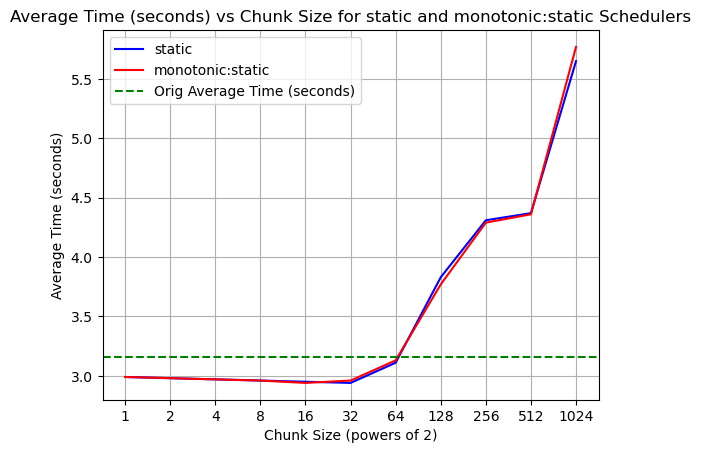

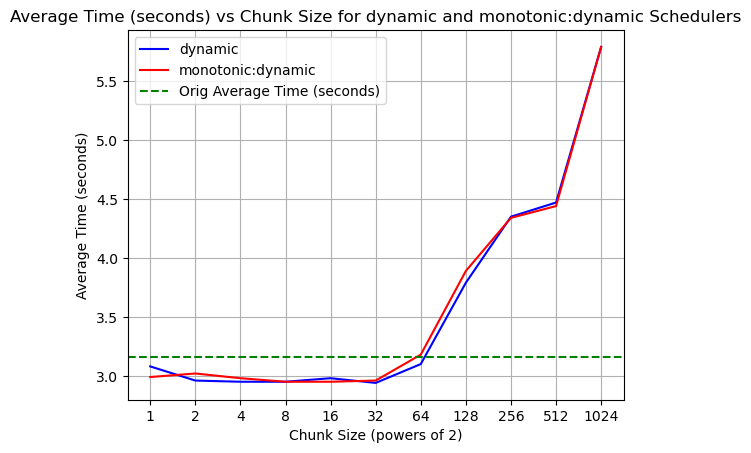

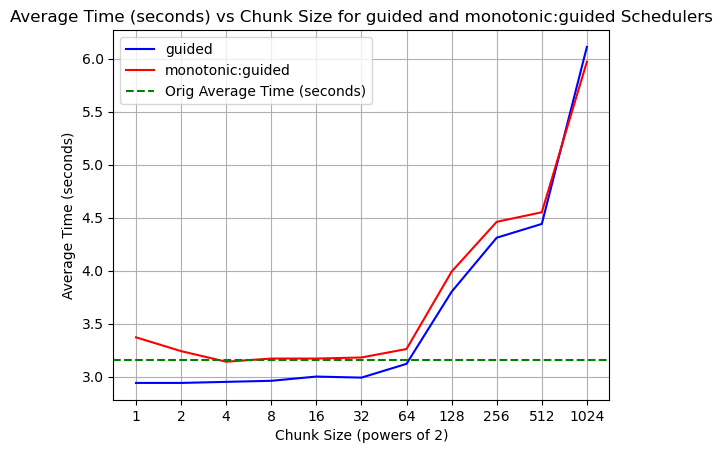

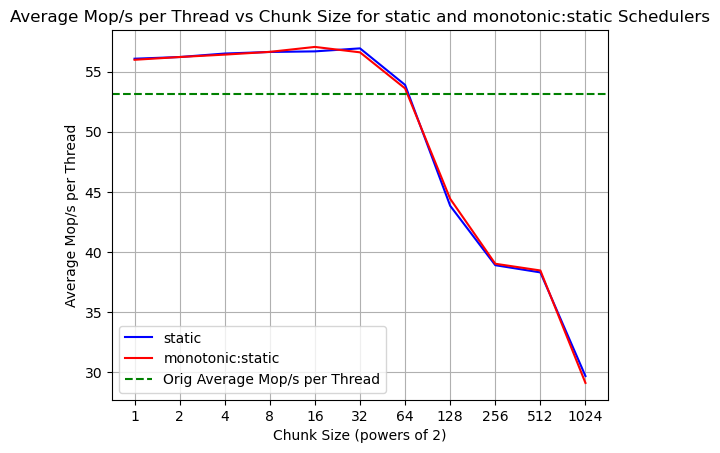

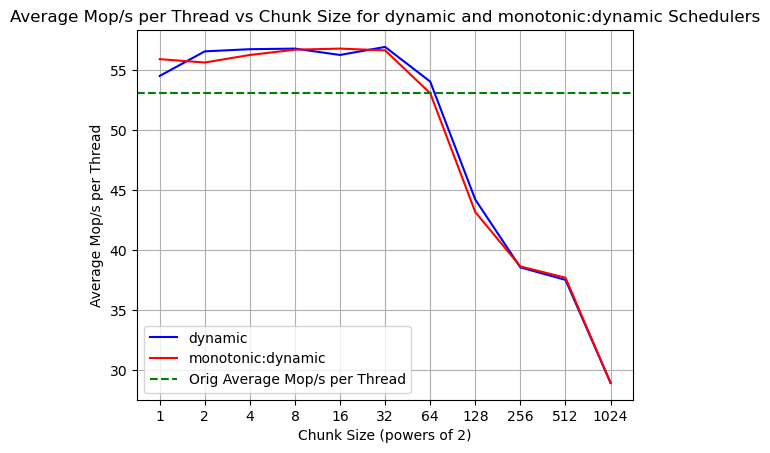

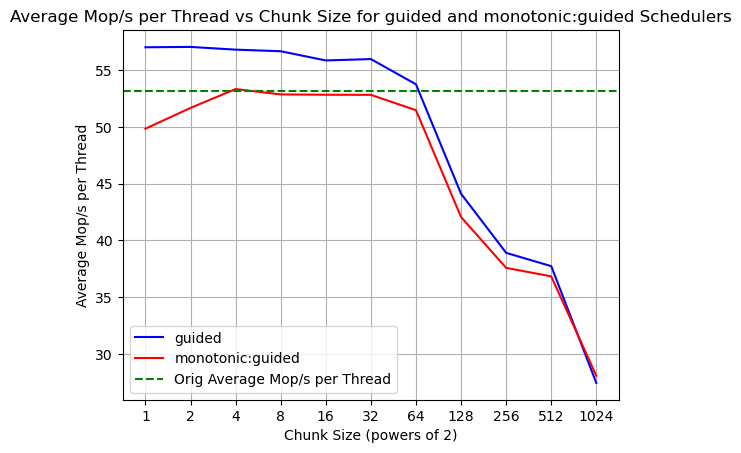

In [16]:
file_path = 'outputs/is.C.average.txt'  # Replace 'output.txt' with the path to your output file
data = read_data(file_path)
plot_data(data)
plot_data(data, "mop_thread")
